# Open Acces Analysis: UdeA
Based in http://oadoi.org full DataBase

[ES]
Son los resultados de Open Access. de la UdeA que están basados en combinar las bases de datos Web of Science, SCOPUS y SCIELO lcon la base de datos de oadoi.org en JSON:

De los 15550 artículos de la UdeA  se analizaron los 7990 que tienen DOI:

* TOTAL: __7993__
* Open Access (OA) Total: __3491__
   1. OA Yellow: 1505
   1. OA Green Total: 1986
        *  OA Green en revistas OA:  1726
        * OA Green en revistas no OA: 260

De los __1726__  OA Green y usando la plataforma DOAJ, se logró identificar al APC de __1487__ artículos,  de los cuales __884__ no tienen cobro de APC, y __603__ tienen cobro de APC que convertiido a dolares da el monto total:

APC para __603__ artículos:   908 493 USD

Notebook (en mejoras. Para correrlo se debe instalar la extensión Colaboratory: http://bit.ly/Colaboratory,  de Google Drive):

https://colab.research.google.com/github/restrepo/medicion/blob/master/cienciometria/OpenAccess.ipynb

Bases de datos de resuiltados DOI UdeA con información OpenAcces y APC (EXCEL):

http://bit.ly/oadois-udea


## Load UDEA_DOIS

In [0]:
!pip install wosplus openpyxl currencyconverter > /dev/null

In [0]:
%%writefile drive.cfg
[FILES]
DOIS.xlsx               = 1bikNT7Gmp4G7dfeMuGsF-az7D8lskK0O
UDEA_WOS_SCI_SCP.xlsx   = 1o9otmklgh-0w18Avv2ZTKOXr3vZbjwvj
oaudea.xlsx             = 1CcwobiEFACIbffNzNdLxpdxQukr8cZ5x

Overwriting drive.cfg


In [0]:
import wosplus as wp
import numpy as np
import pandas as pd
import os

In [0]:
files=wp.wosplus('drive.cfg')

In [0]:
dois=files.read_drive_excel('DOIS.xlsx')

###  Total UDEA DOIs

In [0]:
dois.shape==(7993, 1)

True

## Normalize DOIS

In [0]:
dois['DI']=dois['DI'].str.lower()

## Load oadoi.org data
Set the Working Directory in the place where the files with the oadoi.org data is located

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
WORK_DIR="drive/My Drive/Colab Notebooks/Data"
os.chdir(WORK_DIR)

In [0]:
oa=pd.read_csv('oadoi.csv')

In [0]:
oa['DOI']=oa['DOI'].str.lower()

In [0]:
yellow=pd.read_csv('oayellowdois.csv')
yellow['DOI']=yellow['DOI'].str.lower()

In [0]:
green=pd.read_csv('oagreendoissn.csv')
green=green.fillna('')
green['DOI']=green['DOI'].str.lower()

In [0]:
greenarticle=pd.read_csv('oagreenarticledois.csv')
greenarticle['DOI']=greenarticle['DOI'].str.lower()

## Merge

### Full Open Acces DOIS

In [0]:
oafdois=dois.merge(oa,left_on='DI',right_on='DOI',how='left')
oafdois=oafdois.fillna('')
oafdois[oafdois.DOI!=''].shape==(3491, 2)

True

In [0]:
oafdois=oafdois.rename({'DOI':'Open_Access'}, axis = 'columns')

### Yellow Open Access  DOIS

In [0]:
oayellowdois=oafdois.merge(yellow,left_on='DI',right_on='DOI',how='left')
oayellowdois=oayellowdois.fillna('')
oayellowdois=oayellowdois.rename({'DOI':'OA_Yellow'}, axis = 'columns')

In [0]:
oayellowdois[oayellowdois['OA_Yellow']!=''].shape==(1505, 3)

True

### Green Open Access DOIs in Open Access journals

In [0]:
oaygdois=oayellowdois.merge(green,left_on='DI',right_on='DOI',how='left')
oaygdois=oaygdois.fillna('')
oaygdois=oaygdois.rename({'DOI':'OA_Green'}, axis = 'columns')

In [0]:
oaygdois[oaygdois['OA_Green']!=''].shape==(1726, 5)

True

check

In [0]:
oaygdois[np.logical_or(oaygdois.OA_Yellow!='' ,oaygdois.OA_Green!='')].shape==(1505+1726,5)

True

### Green Open Access  DOIS in closed journals 

 

In [0]:
oadois=oaygdois.merge(greenarticle,left_on='DI',right_on='DOI',how='left')
oadois=oadois.fillna('')
oadois=oadois.rename({'DOI':'OA_Green_Article'}, axis = 'columns')

In [0]:
oadois[oadois['OA_Green_Article']!=''].shape==(260,6)

True

### Check full Open Access DOIS:

In [0]:
oadois[np.logical_or( np.logical_or(oadois.OA_Yellow!='' ,oadois.OA_Green!=''),oadois.OA_Green_Article!='')].shape==(1505+1726+260,6)

True

Save preliminary results

In [0]:
REBUILD_DB=False
if REBUILD_DB:
    oadois.to_excel('oaudea.xlsx',index=False)

checks:

In [0]:
oadois[:1]

,DI,Open_Access,OA_Yellow,OA_Green,ISSNs,OA_Green_Article
0,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,,,


In [0]:
oadois.shape==(7993, 6)

True

## Load UDEA articles

In [0]:
udea=files.read_drive_excel('UDEA_WOS_SCI_SCP.xlsx')
udea=wp.fill_NaN(udea)

In [0]:
udea['DI']=udea['DI'].str.lower()

### Check with Scopus Open Access information

In [0]:
oascp=udea[udea['SCP_Access Type']=='Open Access'].reset_index(drop=True)

#### Misssing Open Access articles wihtout DOI

In [0]:
oascp[oascp['DI']==''].SO

395    REVISTA BRASILEIRA DE FARMACOGNOSIA-BRAZILIAN ...
396             BRAZILIAN JOURNAL OF INFECTIOUS DISEASES
397                     Revista de la educación superior
398                                     Gaceta Sanitaria
400                                    ATENCION PRIMARIA
401                 Revista Colombiana de Anestesiología
402                 Revista Colombiana de Anestesiología
403                 Revista Colombiana de Anestesiología
405                 Revista Colombiana de Anestesiología
406                 Revista Colombiana de Anestesiología
407                      Revista argentina de radiología
408           Corpoica Ciencia y Tecnología Agropecuaria
409                    Revista Colombiana de Cardiología
410           Corpoica Ciencia y Tecnología Agropecuaria
411           Corpoica Ciencia y Tecnología Agropecuaria
412                     Revista de la educación superior
413                                             Infectio
414                    Revista 

#### Quality check:  
Scopus has Open Access information; Expected 0 news:

In [0]:
oascp['OA_SCP']=oascp['DI']

In [0]:
kk=oascp[oascp['OA_SCP']!=''][['OA_SCP']].merge(oadois,left_on='OA_SCP',right_on='Open_Access',how='left')

In [0]:
kk[kk['Open_Access']==''].shape

(0, 7)

## APC from DOAJ. ISSNs are required

### Normalize ISSNs

In [0]:
udea[ udea['DI'].str.lower().str.contains('10.1109/cerma.2010.131') ][['DI','SN','EI','SCI_SN','SCP_ISSN']]

,DI,SN,EI,SCI_SN,SCP_ISSN
8252,10.1109/cerma.2010.131,,,,


In [0]:
udea['SN'][:1]

0    0002-9378\n
Name: SN, dtype: object

In [0]:
udea[ udea['SCI_SN']!='' ].SCI_SN[:1]

1186    2175-7968\n
Name: SCI_SN, dtype: object

Combine ISSNs

In [0]:
import numpy as np

TODO: Move to WOSplus normalization

In [0]:
udea['ISSNWOS']=( udea['SN']+udea['EI']+udea['SCI_SN']+udea['SCP_ISSN'].str.replace('(^[a-zA-Z0-9]{4})([a-zA-Z0-9]{4}$)',r'\1-\2\n')
                                            ).str.split('\n').str[:-1].apply(np.unique).apply(','.join)

### Add normalized ISSNs to Open Acces DataFrame

In [0]:
oadois[:1]

,DI,Open_Access,OA_Yellow,OA_Green,ISSNs,OA_Green_Article
0,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,,,


Add ISSN column to DOIs database

In [0]:
udeadois=oadois.merge( udea[['DI','ISSNWOS']],on='DI',how='left')  

In [0]:
udeadois=udeadois.fillna('')

TODO: 10.7705/biomedica.v37i3.4058	 was missindentified as Yellow when really is Green:

In [0]:
udeadois[:3]

,DI,Open_Access,OA_Yellow,OA_Green,ISSNs,OA_Green_Article,ISSNWOS
0,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,,,,0120-4157
1,10.1016/j.actatropica.2017.11.004,,,,,,"0001-706X,1873-6254"
2,10.1186/s40104-017-0225-x,10.1186/s40104-017-0225-x,,10.1186/s40104-017-0225-x,2049-1891,,2049-1891


###  Search APC  in DOAJ
We only search for official ISSNs for aodoi.org defined for OA Green articles. TODO: Search for all ISSNWOS

In [0]:
def get_APC(issn):
    from bs4 import BeautifulSoup
    import requests
    import random
    import time

    url='https://doaj.org/toc/{}'.format(issn)
    r=requests.get(url)
    soup=BeautifulSoup(r.text)
    try:
        APC=soup.find_all('div',{"class":"box slim"})[0].contents[3].contents[2].strip()
        # Found and empty:  APC: No.
        if not APC:
            APC='0NOT'
    except:
        APC=''
        
    time.sleep(random.randint(1,3))    
    return APC

check

In [0]:
sn='2045-2322'#'0120-4157'#'2045-2322'#'0960-9822'#'2211-3797'
get_APC(sn)

'1165GBP'

Get for all ISSNs

In [0]:
udeadois[ udeadois['ISSNs']!='' ].ISSNs.unique().shape

(484,)

In [0]:
REBUILD_APC=False
if REBUILD_APC:
    apcs=[] 
    for snl in udeadois[ udeadois['ISSNs']!='' ].ISSNs.unique():
        for sn in snl.split(','):
            xapc=get_APC(sn)
            if xapc:
                apcs.append({'OAGISSN':snl,'APC':xapc})
                break
                
    apcf=pd.DataFrame( apcs )
    apcf=apcf.fillna('')
    apc=apcf[apcf.APC!=''].reset_index(drop=True)

Conver to APC local currency to USD Dollars

In [0]:
import re
from currency_converter import CurrencyConverter
c = CurrencyConverter()

def usd(APC):
    import sys
    apcusd=0
    i=re.search(r"([0-9\.\,]+)([a-zA-Z]+)",APC)
    items=i.groups()
    if len(items)==2:
        try:
            apcusd=c.convert(float(items[0]),items[1],'USD')

        #capture error message: https://stackoverflow.com/a/4690655        
        except ValueError as e: 
            #Missing currencies
            COP_to_USD=1/3000.
            ARS_to_USD=1/36.2
            if str(e).split()[0]=='NOT':
                apcusd=0
            elif str(e).split()[0]=='COP':
                apcusd=float(items[0])*COP_to_USD
            elif str(e).split()[0]=='ARS':
                apcusd=float(items[0])*ARS_to_USD
            else:
                sys.exit(e)
    else:
        apcusd=0
            
    return int( apcusd  )

Check

In [0]:
usd( '5000ARS' )

138

Apply to DOIs database

In [0]:
if REBUILD_APC:
    apc['APC_USD']=apc.APC.apply(usd)

In [0]:
if REBUILD_APC:
    apc.to_csv('apc.csv',index=False)
else:
    apc=pd.read_csv('apc.csv')
    apc=wp.fill_NaN(apc)

Prepare Final Data base

In [0]:
udeadois[:2]

,DI,Open_Access,OA_Yellow,OA_Green,ISSNs,OA_Green_Article,ISSNWOS
0,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,,,,0120-4157
1,10.1016/j.actatropica.2017.11.004,,,,,,"0001-706X,1873-6254"


In [0]:
UDEADOIS=udeadois.merge(apc,left_on='ISSNs',right_on='OAGISSN',how='left')

In [0]:
UDEADOIS[:3]

,DI,Open_Access,OA_Yellow,OA_Green,ISSNs,OA_Green_Article,ISSNWOS,APC,OAGISSN,APC_USD
0,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,,,,0120-4157,NaN,NaN,NaN
1,10.1016/j.actatropica.2017.11.004,,,,,,"0001-706X,1873-6254",NaN,NaN,NaN
2,10.1186/s40104-017-0225-x,10.1186/s40104-017-0225-x,,10.1186/s40104-017-0225-x,2049-1891,,2049-1891,550GBP,2049-1891,713.0


In [0]:
UDEADOIS=wp.fill_NaN( UDEADOIS )

In [0]:
REBUILD_DB=False

In [0]:
if REBUILD_DB:
    UDEADOIS.to_excel('oaudea.xlsx',index=False)
else:
    UDEADOIS=pd.read_excel('oaudea.xlsx')

In [0]:
UDEADOIS=wp.fill_NaN(UDEADOIS)

Quality checks: Only Open Access have APCs. Expected 0

In [0]:
tmp=UDEADOIS[UDEADOIS['Open_Access']=='']
tmp[ tmp['APC']!=''].shape # expected 0

(0, 10)

### Number of Open Acces articles with APC information

In [0]:
OAUDEA=UDEADOIS[ np.logical_or (UDEADOIS['OA_Green']!='',UDEADOIS['OA_Green_Article']!='') ]

In [0]:
OAPCUDEA=OAUDEA[OAUDEA['APC']!='']
OAPCUDEA.shape==(1487,10)

True

In [0]:
OAPCUDEA[OAPCUDEA['APC']=='0NOT'].shape==(884, 10)

True

In [0]:
OAPCUDEA[OAPCUDEA['APC']!='0NOT'].shape==(603, 10)

True

### Calculates APC

In [0]:
OAUDEA.APC_USD.sum()

908493

## The end
Be sure the notebook stop

In [0]:
STOPHERE

## Add year information

In [0]:
udea['Year']=( udea['PY'].astype(str)+';'+udea['SCI_PY'].astype(str)+';'+udea['SCP_Year'].astype(str) ).str.split(';').str[0].astype(int)

In [0]:
udeay=udea[udea.DI!='']

In [0]:
UDEADOIS=UDEADOIS.merge( udeay[['DI','Year']],on='DI',how='left' )

In [0]:
UDEADOIS[:1]

,DI,Open_Access,OA_Yellow,OA_Green,ISSNs,OA_Green_Article,ISSNWOS,APC,OAGISSN,APC_USD,Year
0,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,10.7705/biomedica.v37i3.4058,,,,0120-4157,,,0,2017


In [0]:
if REBUILD_DB:
#if True:    
    UDEADOIS.to_excel('oaudea.xlsx',index=False)

In [0]:
OAUDEA=UDEADOIS[ np.logical_or (UDEADOIS['OA_Green']!='',UDEADOIS['OA_Green_Article']!='') ]

In [0]:
OAUDEA[OAUDEA['APC']!=''].shape

(1499, 11)

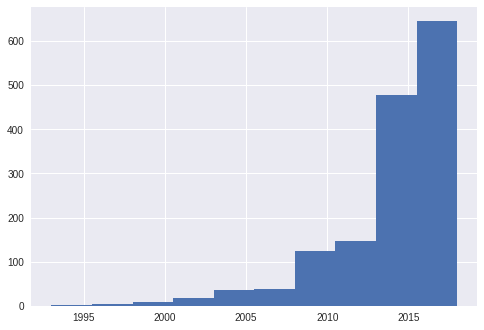

In [0]:
OAUDEA[OAUDEA['APC']!=''].Year.hist()

# Consultar  DOAJ API con DOI
Ver: https://doaj.org/api/v1/docs#!/Search/get_api_v1_search_articles_search_query

## Carga navegador JSON

In [0]:
import pandas as pd

## Consulta

In [0]:
DOI='10.1016/j.physletb.2018.01.009'
df=pd.read_json('https://doaj.org/api/v1/search/articles/{}'.format(DOI))

## Análisis de resultado:
Nota: La celdas con estructuras anidadas (que comienzan con `[` ó `{`) sa analizan secuencialmente

In [0]:
df

,last,page,pageSize,query,results,timestamp,total
0,https://doaj.org/api/v1/search/articles/10.101...,1,10,10.1016/j.physletb.2018.01.009,"{u'last_updated': u'2018-03-05T12:09:16Z', u'i...",2018-1010T04:23:08Z,1


Desplegar colunna __results__:

In [0]:
p=pd.DataFrame(  df['results'].values[0] )
p

,bibjson,created_date,id,last_updated
abstract,The observation of neutrino oscillations estab...,2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
author,"[{u'affiliation': u'Physics Department, Univer...",2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
end_page,100,2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
identifier,"[{u'type': u'pissn', u'id': u'0370-2693'}, {u'...",2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
journal,"{u'publisher': u'Elsevier', u'language': [u'EN...",2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
link,[{u'url': u'http://www.sciencedirect.com/scien...,2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
month,3,2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
start_page,94,2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
subject,"[{u'code': u'QC1-999', u'term': u'Physics', u'...",2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z
title,Expanding the reach of heavy neutrino searches...,2018-03-05T12:09:16Z,03ba3f288d8341d380a286a6d0f64de4,2018-03-05T12:09:16Z


Desplegar cada una de las celdas anidadas de la columna __bibjson__

In [0]:
pd.DataFrame(  p.loc['author','bibjson'] )

,affiliation,name
0,"Physics Department, Universidad de los Andes, ...",Andrés Flórez
1,"Department of Physics and Astronomy, Vanderbil...",Kaiwen Gui
2,"Department of Physics and Astronomy, Vanderbil...",Alfredo Gurrola
3,"Physics Department, Universidad de los Andes, ...",Carlos Patiño
4,"Department of Physics, Universidad de Antioqui...",Diego Restrepo


In [0]:
pd.DataFrame(  p.loc['identifier','bibjson'] )

,id,type
0,0370-2693,pissn
1,1873-2445,eissn
2,10.1016/j.physletb.2018.01.009,doi


In [0]:
 pd.DataFrame( [p.loc['journal','bibjson'] ] )


,country,issns,language,license,number,publisher,title,volume
0,NL,"[0370-2693, 1873-2445]",[EN],[{u'url': u'http://www.elsevier.com/journals/p...,C,Elsevier,Physics Letters B,778


In [0]:
pd.DataFrame( p.loc['journal','bibjson']['license'] )

,open_access,title,type,url
0,True,CC BY,CC BY,http://www.elsevier.com/journals/physics-lette...


In [0]:
pd.DataFrame(  p.loc['link','bibjson']  )

,type,url
0,fulltext,http://www.sciencedirect.com/science/article/p...


# Dask

In [0]:
! pip install dask cloudpickle > /dev/null

In [0]:
1+1

2

In [0]:
import dask as dk

In [0]:
from dask import dataframe

In [0]:
%%writefile kk.json
{"A":1,"B":3}
{"A":5,"B":6}

Writing kk.json


In [0]:
df=dataframe.read_json('kk.json')

In [0]:
df.compute()

,A,B
0,1,3
1,5,6


In [0]:
import pandas as pd

In [0]:
pd.read_json('kk.json',orient='records',lines=True)

,A,B
0,1,3
1,5,6


In [0]:
import os
os.chdir('drive/My Drive/Colab Notebooks/Data')

In [0]:
!head -n10 oagreenarticle.json > tmp.json

In [0]:
import pandas as pd

In [0]:
pd.read_json('tmp.json',orient='records',lines=True)[:3]

,best_oa_location,data_standard,doi,doi_url,genre,is_oa,journal_is_in_doaj,journal_is_oa,journal_issns,journal_name,oa_locations,published_date,publisher,title,updated,year,z_authors
0,{'url': 'https://doi.org/10.1016/j.ahj.2015.02...,2,10.1016/j.ahj.2015.02.019,https://doi.org/10.1016/j.ahj.2015.02.019,journal-article,True,False,False,0002-8703,American Heart Journal,[{'url': 'https://doi.org/10.1016/j.ahj.2015.0...,2015-06-01,Elsevier BV,Biomarkers for risk stratification of patients...,2018-06-18T19:10:12.692979,2015.0,"[{'given': 'Matthijs A.', 'family': 'Velders'}..."
1,{'url': 'https://doi.org/10.1021/acsnano.7b049...,2,10.1021/acsnano.7b04994,https://doi.org/10.1021/acsnano.7b04994,journal-article,True,False,False,"1936-0851,1936-086X",ACS Nano,[{'url': 'https://doi.org/10.1021/acsnano.7b04...,2017-09-08,American Chemical Society (ACS),Hybrid Surface Patterns Mimicking the Design o...,2018-06-14T11:39:08.680219,2017.0,[{'ORCID': 'http://orcid.org/0000-0001-5512-74...
2,{'url': 'https://doi.org/10.1016/s0925-4773(00...,2,10.1016/s0925-4773(00)00472-x,https://doi.org/10.1016/s0925-4773(00)00472-x,journal-article,True,False,False,0925-4773,Mechanisms of Development,[{'url': 'https://doi.org/10.1016/s0925-4773(0...,2000-12-01,Elsevier BV,Embryonic expression of a P2X 3 receptor encod...,2018-06-18T04:15:29.411710,2000.0,"[{'given': 'William H.J', 'family': 'Norton'},..."


In [0]:
tmp=dataframe.read_json('tmp.json')

In [0]:
tmp.compute()

,best_oa_location,data_standard,doi,doi_url,genre,is_oa,journal_is_in_doaj,journal_is_oa,journal_issns,journal_name,oa_locations,published_date,publisher,title,updated,year,z_authors
0,{'url': 'https://doi.org/10.1016/j.ahj.2015.02...,2,10.1016/j.ahj.2015.02.019,https://doi.org/10.1016/j.ahj.2015.02.019,journal-article,True,False,False,0002-8703,American Heart Journal,[{'url': 'https://doi.org/10.1016/j.ahj.2015.0...,2015-06-01,Elsevier BV,Biomarkers for risk stratification of patients...,2018-06-18T19:10:12.692979,2015.0,"[{'given': 'Matthijs A.', 'family': 'Velders'}..."
1,{'url': 'https://doi.org/10.1021/acsnano.7b049...,2,10.1021/acsnano.7b04994,https://doi.org/10.1021/acsnano.7b04994,journal-article,True,False,False,"1936-0851,1936-086X",ACS Nano,[{'url': 'https://doi.org/10.1021/acsnano.7b04...,2017-09-08,American Chemical Society (ACS),Hybrid Surface Patterns Mimicking the Design o...,2018-06-14T11:39:08.680219,2017.0,[{'ORCID': 'http://orcid.org/0000-0001-5512-74...
2,{'url': 'https://doi.org/10.1016/s0925-4773(00...,2,10.1016/s0925-4773(00)00472-x,https://doi.org/10.1016/s0925-4773(00)00472-x,journal-article,True,False,False,0925-4773,Mechanisms of Development,[{'url': 'https://doi.org/10.1016/s0925-4773(0...,2000-12-01,Elsevier BV,Embryonic expression of a P2X 3 receptor encod...,2018-06-18T04:15:29.411710,2000.0,"[{'given': 'William H.J', 'family': 'Norton'},..."
3,{'url': 'https://doi.org/10.1016/0021-8693(88)...,1,10.1016/0021-8693(88)90058-0,https://doi.org/10.1016/0021-8693(88)90058-0,journal-article,True,False,False,0021-8693,Journal of Algebra,[{'url': 'https://doi.org/10.1016/0021-8693(88...,1988-10-01,Elsevier BV,Corrigendum,2018-06-18T04:18:43.222135,1988.0,None
4,{'url': 'https://doi.org/10.1016/j.mod.2006.03...,2,10.1016/j.mod.2006.03.003,https://doi.org/10.1016/j.mod.2006.03.003,journal-article,True,False,False,0925-4773,Mechanisms of Development,[{'url': 'https://doi.org/10.1016/j.mod.2006.0...,2006-05-01,Elsevier BV,Impaired development of the Harderian gland in...,2018-06-18T04:20:45.498171,2006.0,"[{'given': 'Andreas', 'family': 'Schild'}, {'g..."
5,{'url': 'https://doi.org/10.1103/physrevc.96.0...,2,10.1103/physrevc.96.014310,https://doi.org/10.1103/physrevc.96.014310,journal-article,True,False,False,"2469-9985,2469-9993",Physical Review C,[{'url': 'https://doi.org/10.1103/physrevc.96....,2017-07-14,American Physical Society (APS),Nuclear deformation in the A≈100 region: Compa...,2018-06-16T19:57:39.403083,2017.0,"[{'given': 'A.', 'family': 'de Roubin'}, {'giv..."
6,{'url': 'https://doi.org/10.1016/s0960-9822(07...,2,10.1016/s0960-9822(07)00493-9,https://doi.org/10.1016/s0960-9822(07)00493-9,journal-article,True,False,False,0960-9822,Current Biology,[{'url': 'https://doi.org/10.1016/s0960-9822(0...,1998-10-01,Elsevier BV,Protein kinase B (PKB/Akt) activity is elevate...,2018-06-18T04:21:43.465040,1998.0,"[{'given': 'Daphne', 'family': 'Haas-Kogan'}, ..."
7,{'url': 'https://doi.org/10.1016/s1470-2045(13...,2,10.1016/s1470-2045(13)70163-3,https://doi.org/10.1016/s1470-2045(13)70163-3,journal-article,True,False,False,1470-2045,The Lancet Oncology,[{'url': 'https://doi.org/10.1016/s1470-2045(1...,2013-07-01,Elsevier BV,Panitumumab and irinotecan versus irinotecan a...,2018-06-18T19:11:38.984437,2013.0,"[{'given': 'Matthew T', 'family': 'Seymour'}, ..."
8,{'url': 'https://doi.org/10.24159/joec.2014.20...,2,10.24159/joec.2014.20.4.281,https://doi.org/10.24159/joec.2014.20.4.281,journal-article,True,False,False,1598-9283,Journal of Education & Culture,[{'url': 'https://doi.org/10.24159/joec.2014.2...,2014-12-01,Education Research Institute,The Research on the Values and Lifestyles of K...,2018-06-18T05:26:34.731357,2014.0,"[{'family': 'Kim,Heung-Kyu'}, {'family': '이상란'}]"
9,{'url': 'https://doi.org/10.5194/acp-2016-560-...,2,10.5194/acp-2016-560-ac1,https://doi.org/10.5194/acp-2016-560-ac1,component,True,False,False,None,None,[{'url': 'https://doi.org/10.5194/acp-2016-560...,None,Copernicus GmbH,None,2018-

In [0]:
dataframe.read_json?

In [0]:
df=dataframe.read_json('oagreenarticle.json')

NameError: ignored

In [0]:
import dask.bag as db

In [0]:
import json
b = db.read_text('tmp.json').map(json.loads)

In [0]:
bb=b.to_dataframe()

In [0]:
bbb=bb['doi']